<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

[中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# 1. Setup
Setup process

In [ ]:
!pip install ultralytics &> /dev/null
!pip install -q supervision roboflow &> /dev/null

In [ ]:
import numpy as np, pandas as pd, os, random
import matplotlib.pyplot as plt
import cv2
import torch
from ultralytics import YOLO
from roboflow import Roboflow

In [ ]:
#newest

rf = Roboflow(api_key="PtCe8OxUEmMnWqI5qbSi")
project = rf.workspace("testi-vq2kh").project("ripeness-prediction-2")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ripeness-Prediction-2-4 in yolov8:: 100%|██████████| 2046/2046 [00:00<00:00, 2274.65it/s]


In [ ]:
def count_images(directory):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif')
    image_count = 0

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_count += 1

    return image_count

# Specify the directory path
directory_path = '/content/Square-White-Background-Campur-5/valid/images'  # Replace with your actual path

# Count images
total_images = count_images(directory_path)

print(f"Total number of images in {directory_path}: {total_images}")

Total number of images in /content/Square-White-Background-Campur-5/valid/images: 42


# 2. Train
Training process

In [ ]:
import yaml

# Load the YAML file
data_yaml_path = '/content/Ripeness-Prediction-2-4/data.yaml'
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Update the paths
data_yaml['train'] = '/content/Ripeness-Prediction-2-4/train/images'
data_yaml['val'] = '/content/Ripeness-Prediction-2-4/valid/images'
data_yaml['test'] = '/content/Ripeness-Prediction-2-4/test/images'

# Save the updated YAML file
with open(data_yaml_path, 'w') as file:
    yaml.safe_dump(data_yaml, file)

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8m.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data='/content/Ripeness-Prediction-2-4/data.yaml', epochs=100, batch=32,
                                       imgsz=416, device=0, patience=0, lr0=0.1, weight_decay=0.1, plots=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 295MB/s]


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Ripeness-Prediction-2-4/data.yaml, epochs=100, time=None, patience=0, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Ripeness-Prediction-2-4/train/labels... 790 images, 0 backgrounds, 0 corrupt: 100%|██████████| 790/790 [00:00<00:00, 1363.92it/s]


train: New cache created: /content/Ripeness-Prediction-2-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2878, len(boxes) = 3319. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Ripeness-Prediction-2-4/valid/labels... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<00:00, 997.57it/s] 


val: New cache created: /content/Ripeness-Prediction-2-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 377, len(boxes) = 486. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.1), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.91G       1.28       2.76      1.504        173        416: 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all        168        486      0.232      0.415      0.235      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       5.9G      1.151      2.032      1.373        166        416: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all        168        486      0.064      0.222     0.0417     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.87G      1.142      1.929      1.388        135        416: 100%|██████████| 25/25 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        168        486      0.228      0.266      0.154     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.72G      1.153      1.924      1.365        150        416: 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]

                   all        168        486     0.0793      0.182     0.0362     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.85G      1.185      1.917      1.393        152        416: 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        168        486      0.231      0.552      0.263      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.75G      1.165      1.847      1.384        159        416: 100%|██████████| 25/25 [00:13<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all        168        486       0.29      0.431      0.301      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.84G      1.125      1.761      1.359        155        416: 100%|██████████| 25/25 [00:11<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all        168        486      0.264       0.68      0.383      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.76G      1.075      1.725      1.331        116        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all        168        486      0.323      0.387      0.194       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       5.9G      1.069      1.685       1.33        145        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all        168        486      0.384       0.71      0.483      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.75G      1.045      1.648      1.306        171        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        168        486      0.413      0.608      0.491       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.84G       1.07      1.638      1.319        191        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all        168        486      0.447      0.581      0.537      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.68G      1.009      1.587      1.291        184        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all        168        486      0.307      0.766      0.521      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.84G      1.013      1.574      1.279        209        416: 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all        168        486      0.469      0.678      0.551      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.78G       1.02      1.575      1.295        168        416: 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        168        486      0.433      0.641      0.475      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.87G      1.018      1.575      1.296        130        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all        168        486      0.444      0.628      0.513      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.69G     0.9969       1.53      1.285        123        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        168        486      0.486      0.657      0.588      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.86G     0.9713      1.441      1.262        152        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all        168        486       0.54      0.655      0.591      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.76G      0.952      1.433      1.242        159        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        168        486      0.477      0.737      0.592      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.86G     0.9382      1.427      1.243        186        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all        168        486      0.628       0.59      0.589      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.76G     0.9367      1.434      1.245        134        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all        168        486      0.543       0.66      0.605      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.87G     0.9202      1.394       1.24        170        416: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        168        486      0.595      0.757       0.72       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.77G     0.8784      1.345      1.208        167        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        168        486      0.532      0.715      0.624      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.87G     0.8937       1.34      1.228        160        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all        168        486      0.586      0.715      0.659      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.77G      0.901      1.355      1.226        156        416: 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        168        486      0.633      0.626      0.701      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.81G     0.8623      1.312      1.197        150        416: 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        168        486      0.679      0.684      0.747      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.76G     0.8631      1.287      1.203        179        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        168        486      0.516      0.759      0.638      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.85G     0.8774      1.315      1.208        156        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all        168        486      0.563      0.731      0.708       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.68G      0.854      1.285      1.195        178        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.564      0.754      0.648      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.83G     0.8367      1.239      1.188        145        416: 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        168        486      0.577      0.672      0.684      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.67G     0.8466       1.28       1.19        153        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all        168        486      0.523      0.756      0.645      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.84G     0.8402      1.236       1.19        129        416: 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.554       0.76      0.641      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.75G     0.8555      1.245      1.199        138        416: 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all        168        486      0.582      0.718      0.635      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.81G     0.8267      1.237      1.181        138        416: 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all        168        486      0.504      0.764      0.596      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.67G     0.8132      1.201      1.175        194        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all        168        486      0.587      0.684      0.637      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       5.9G     0.8155      1.193      1.178        182        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        168        486      0.571      0.742      0.707      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.76G     0.8147      1.175      1.174        136        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        168        486      0.608       0.75       0.71      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.86G       0.82      1.131       1.16        122        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all        168        486      0.476      0.735       0.65      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.77G     0.7952      1.121      1.154        140        416: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all        168        486      0.632      0.776      0.754      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.84G     0.8055       1.14      1.162        142        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all        168        486       0.62      0.725        0.7      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.71G     0.7941      1.138      1.164        135        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        168        486      0.658      0.732       0.73      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.83G     0.7884      1.068      1.148        148        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all        168        486      0.758      0.721      0.785      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.76G     0.7918      1.083      1.151        165        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all        168        486      0.674      0.753      0.752      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.84G     0.7897      1.119       1.16        149        416: 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.631      0.696      0.702      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.68G     0.7577      1.043      1.128        159        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all        168        486      0.696      0.735      0.753      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.89G     0.7564      1.043      1.134        153        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all        168        486      0.692        0.8      0.774      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.79G     0.7665      1.058      1.143        164        416: 100%|██████████| 25/25 [00:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all        168        486      0.642      0.764      0.756      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.86G     0.7559      1.051      1.137        132        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all        168        486      0.622      0.713      0.669      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.76G     0.7389      1.005      1.118        138        416: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all        168        486      0.647      0.802      0.767      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.83G     0.7408      1.021      1.126        130        416: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        168        486      0.657      0.777       0.75      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.73G     0.7423      1.005      1.133        125        416: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all        168        486      0.715      0.717      0.759      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.85G     0.7192     0.9614      1.115        189        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all        168        486       0.65      0.756      0.726      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.78G     0.7389     0.9877      1.119        204        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        168        486      0.748      0.691      0.751      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.85G     0.7335     0.9822      1.122        185        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        168        486      0.744      0.758      0.792      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.74G     0.7191     0.9704      1.116        181        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        168        486      0.662      0.766       0.74      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.88G      0.717      0.954      1.119        167        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all        168        486      0.598      0.736      0.742      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.75G     0.7118     0.9518      1.109        179        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        168        486      0.788      0.796      0.834      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.84G     0.6985     0.8953      1.096        160        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all        168        486      0.682      0.796      0.788      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.72G     0.6985     0.9187      1.102        164        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.732      0.801      0.822      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.9G     0.7092     0.9266      1.114        161        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all        168        486      0.741      0.801      0.815      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.78G     0.6924     0.8836      1.094        159        416: 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        168        486      0.653      0.724      0.729      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.84G     0.6967     0.8871      1.103        133        416: 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        168        486      0.647      0.817      0.775      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       5.7G     0.6897     0.8737      1.085        151        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all        168        486      0.698      0.821      0.816      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.84G      0.688     0.8691      1.094        145        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all        168        486       0.76      0.793      0.836      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.75G     0.6686      0.867      1.092        152        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        168        486      0.649      0.792      0.787      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.81G     0.6658     0.8317      1.087        166        416: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all        168        486      0.756      0.753      0.793      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.77G     0.6603     0.8259      1.083        192        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all        168        486      0.713       0.79      0.816       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.86G     0.6546     0.8315       1.08        171        416: 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all        168        486      0.732      0.818      0.855      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.75G     0.6743     0.8337       1.09        135        416: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all        168        486      0.696      0.789      0.777      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.85G      0.658     0.7962      1.073        131        416: 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.703      0.806      0.815      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.69G     0.6477      0.787      1.068        204        416: 100%|██████████| 25/25 [00:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all        168        486      0.702      0.829      0.808      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.85G      0.634     0.7582      1.067        128        416: 100%|██████████| 25/25 [00:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.724      0.814      0.801      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.69G     0.6192     0.7208      1.048        167        416: 100%|██████████| 25/25 [00:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all        168        486      0.746      0.802      0.835      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.84G     0.6494     0.7693      1.071        184        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        168        486      0.727      0.811      0.829      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.68G      0.632     0.7539      1.068        129        416: 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all        168        486      0.765      0.756      0.804      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.81G     0.6407     0.7425      1.065        157        416: 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        168        486      0.759      0.797      0.841      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.76G     0.6278     0.7563      1.062        134        416: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all        168        486      0.793      0.812      0.841      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.85G     0.6301     0.7228      1.064        134        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        168        486      0.798      0.781      0.826      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.68G     0.6172     0.7415      1.073        149        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        168        486       0.68      0.834      0.786      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.87G     0.6203     0.7079      1.061        170        416: 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all        168        486      0.723      0.746      0.796        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.77G     0.6175     0.7058      1.058        153        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all        168        486      0.672      0.811      0.783      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.87G     0.6105     0.6928       1.05        147        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all        168        486      0.765      0.804      0.837      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.75G      0.614      0.696      1.056        201        416: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486        0.8      0.819      0.845      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.84G       0.61     0.6791      1.055        162        416: 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all        168        486      0.772        0.8      0.836      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.77G     0.6017     0.6728      1.049        170        416: 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        168        486      0.732      0.824      0.844      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.84G     0.5799     0.6614      1.034        216        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        168        486      0.682      0.843      0.824      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       5.7G     0.5843     0.6353      1.034        155        416: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.806      0.739      0.823      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.87G      0.563      0.614      1.028        182        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all        168        486      0.778      0.815      0.837      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.76G     0.5719      0.622      1.026        171        416: 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all        168        486      0.783      0.778      0.811      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.87G     0.5639     0.6049      1.016        130        416: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all        168        486      0.808      0.769      0.839      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.75G      0.574     0.6249      1.035        189        416: 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all        168        486      0.771       0.81      0.837      0.733


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.87G     0.5333     0.5336       1.01         71        416: 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        168        486      0.805      0.776      0.838       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.73G     0.5063     0.4882     0.9996         64        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        168        486      0.759      0.798      0.833      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.81G     0.4978     0.4678      0.988         98        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all        168        486      0.805       0.75      0.816      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.72G     0.4898     0.4414     0.9767         85        416: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        168        486      0.814      0.792      0.843      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.89G     0.4798     0.4275     0.9712         84        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all        168        486      0.766      0.839      0.837       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.75G     0.4847     0.4313     0.9782         88        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all        168        486      0.784       0.84      0.856      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.88G     0.4651     0.3959     0.9555         85        416: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all        168        486      0.804      0.787      0.844      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.73G     0.4714     0.4146     0.9662         47        416: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all        168        486      0.807      0.774      0.842      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.87G      0.467     0.4047     0.9634         74        416: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all        168        486      0.803      0.782      0.842      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.75G     0.4514     0.3876     0.9497         95        416: 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all        168        486      0.812      0.787      0.852      0.754



100 epochs completed in 0.432 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all        168        486      0.784       0.84      0.857      0.757
           empty_bunch         23         28      0.792      0.929      0.941      0.817
              overripe         31         80      0.822        0.9      0.924      0.823
                  ripe         60        210      0.812      0.924      0.895      0.767
             underripe         62        101      0.641      0.733      0.702      0.637
                unripe         29         67       0.85      0.716       0.82       0.74
Speed: 0.1ms preprocess, 4.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


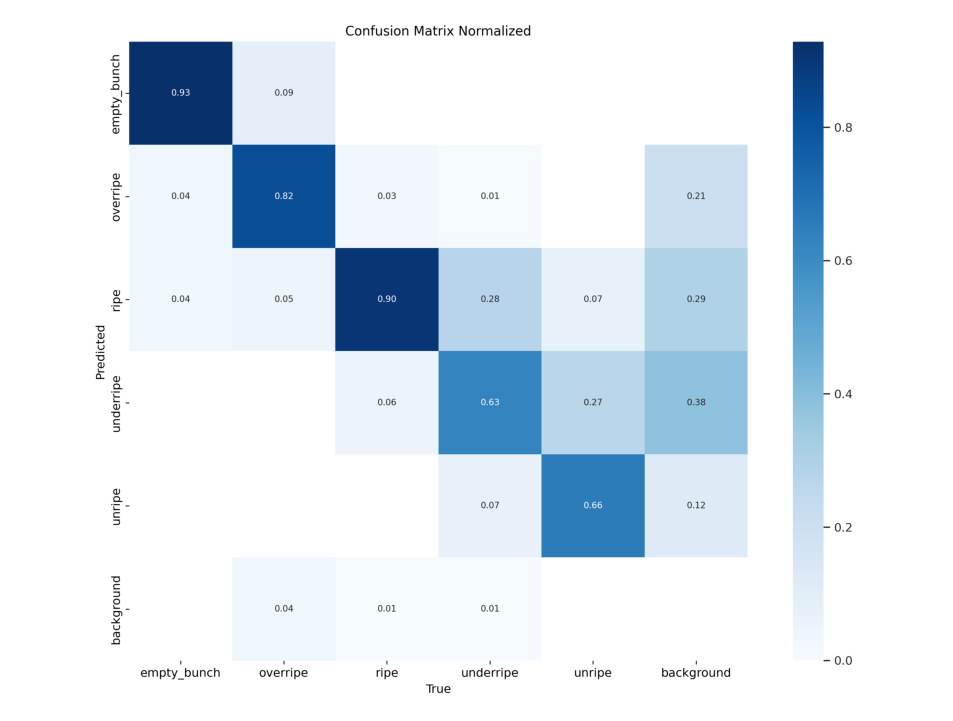

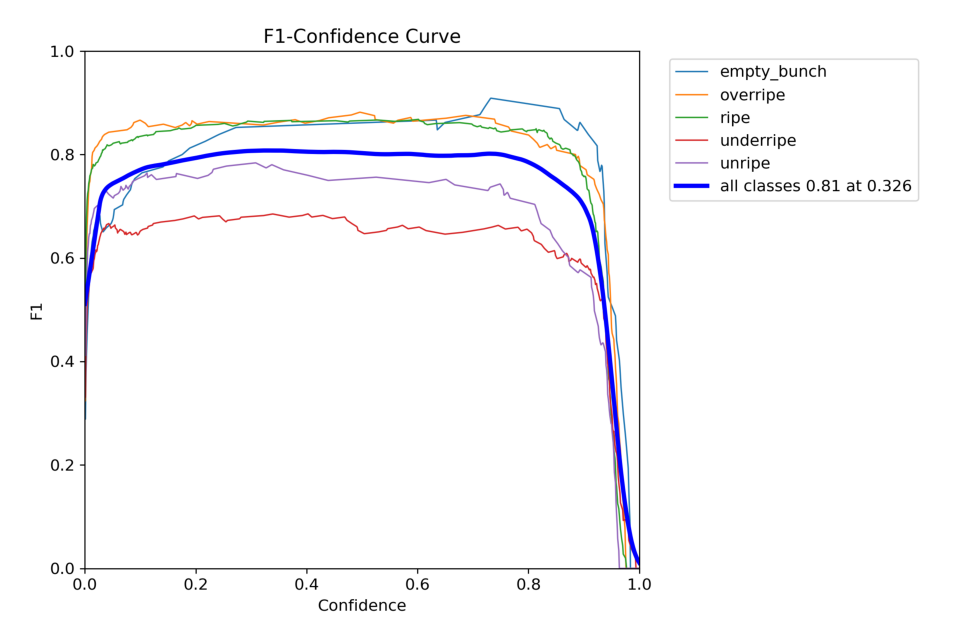

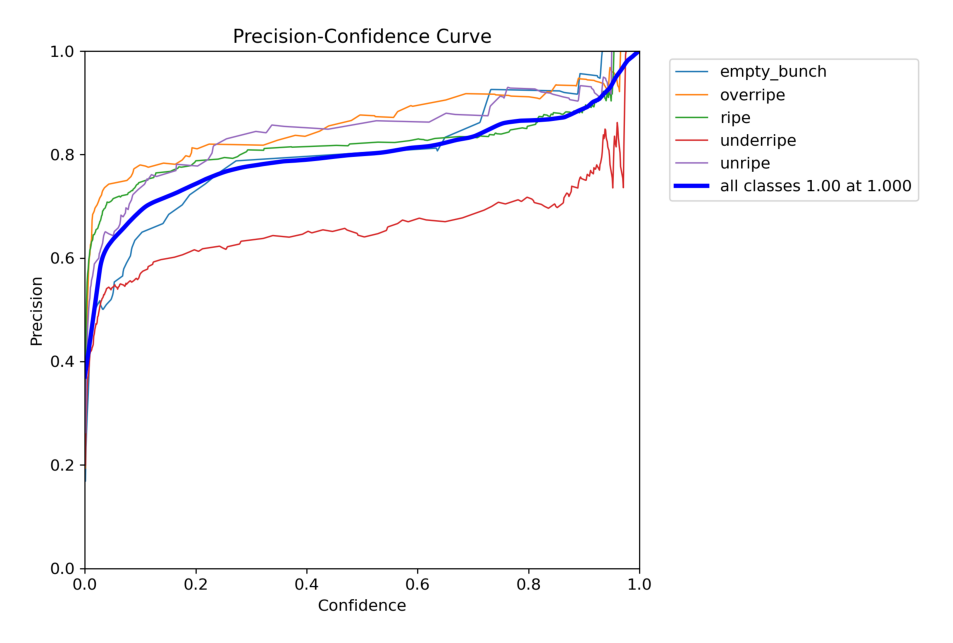

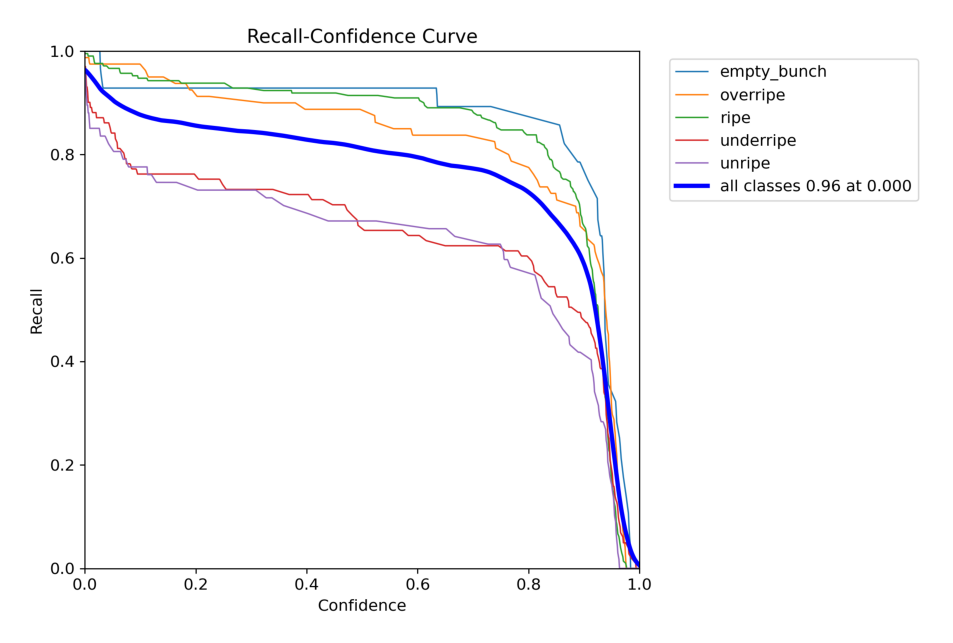

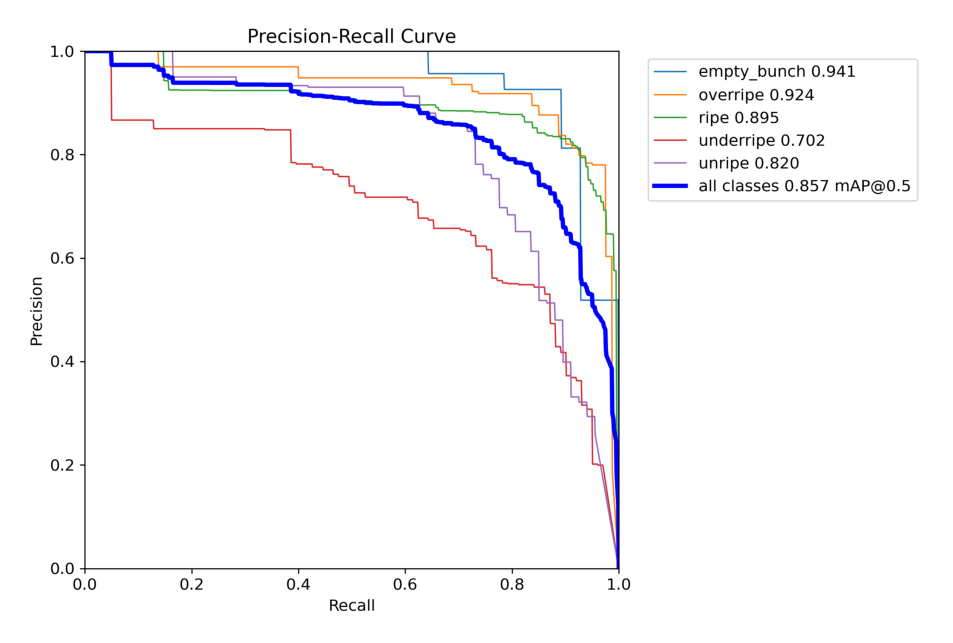

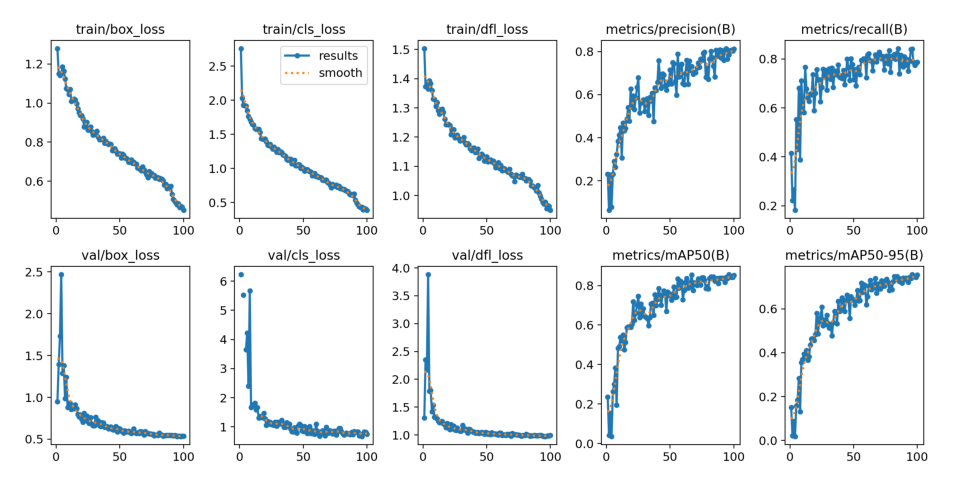

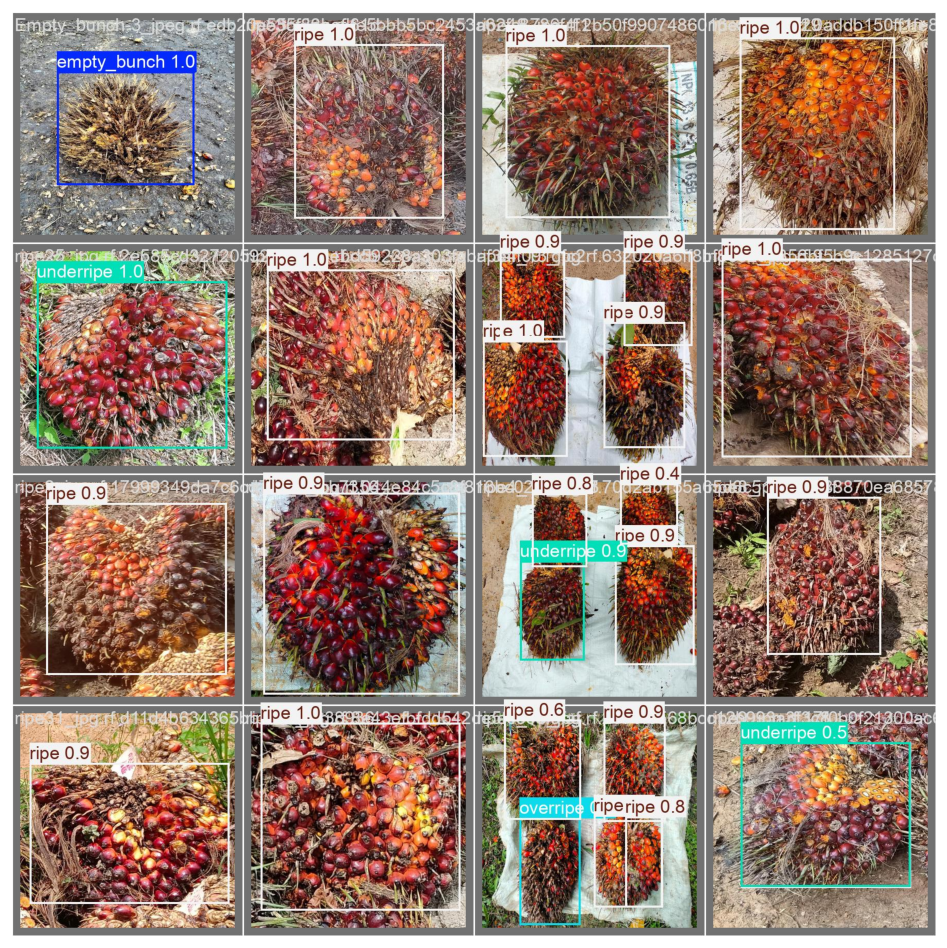

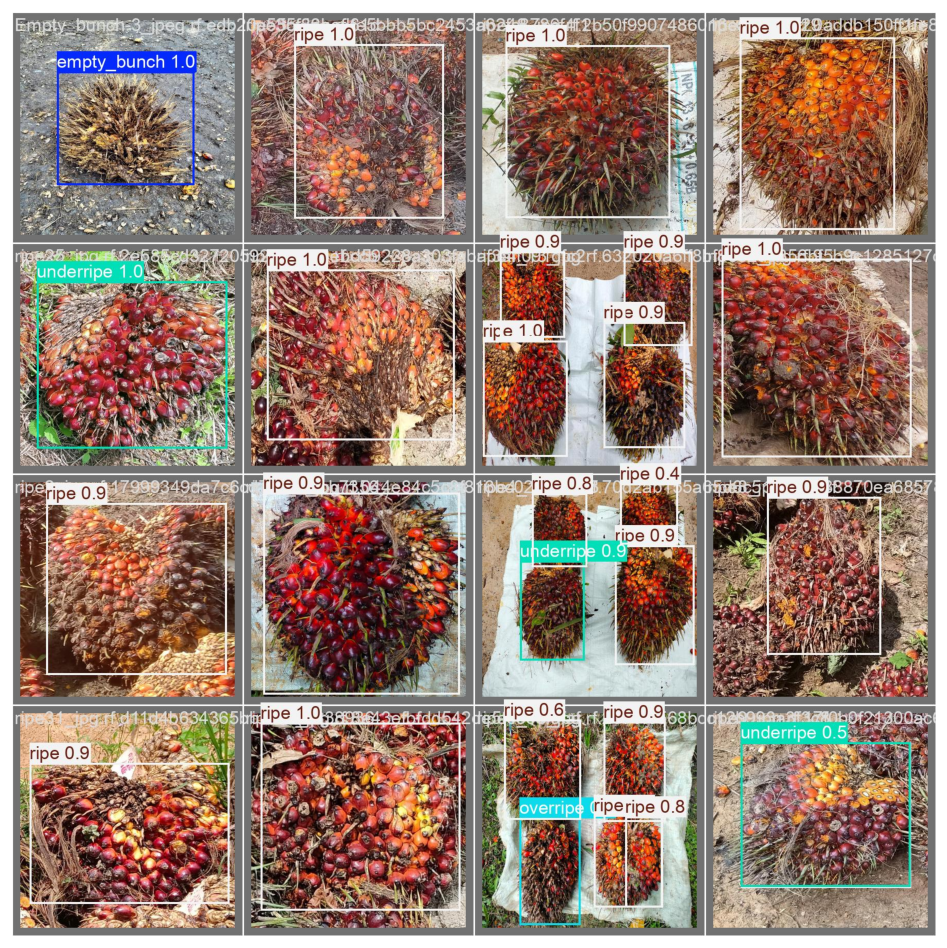

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png',
    'val_batch0_pred.jpg',
    'val_batch0_pred.jpg'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss  \
140                      141                  0.31372   
141                      142                  0.28970   
142                      143                  0.28246   
143                      144                  0.28957   
144                      145                  0.28357   
145                      146                  0.28134   
146                      147                  0.27818   
147                      148                  0.28491   
148                      149                  0.27283   
149                      150                  0.27166   

              train/cls_loss           train/dfl_loss  \
140                  0.24097                  0.82475   
141                  0.21744                  0.81565   
142                  0.20855                  0.81059   
143                  0.21555                  0.81808   
144                  0.20998                  0.81742   
145                  0.21450                  0.81306   
146                  0.20297                  0.80794   
147                  0.20482                  0.81973   
148                  0.19971                  0.81717   
149                  0.20026                  0.81100   

        metrics/precision(B)        metrics/recall(B)  \
140                  0.68269                  0.62131   
141                  0.65045                  0.64080   
142                  0.65283                  0.63324   
143                  0.66287                  0.63420   
144                  0.68672                  0.61972   
145                  0.62231                  0.66783   
146                  0.62186                  0.66332   
147                  0.62731                  0.67680   
148                  0.62166                  0.67446   
149                  0.62696                  0.67327   

            metrics/mAP50(B)      metrics/mAP50-95(B)  \
140                  0.70133                  0.63147   
141                  0.69714                  0.63081   
142                  0.69795                  0.63244   
143                  0.69664                  0.63337   
144                  0.68965                  0.62649   
145                  0.69686                  0.63572   
146                  0.69922                  0.63827   
147                  0.70381                  0.64221   
148                  0.70406                  0.64129   
149                  0.70337                  0.63838   

                val/box_loss             val/cls_loss  \
140                  0.53046                   1.3706   
141                  0.52135                   1.3844   
142                  0.52991                   1.4138   
143                  0.51414                   1.4302   
144                  0.51763                   1.4410   
145                  0.51221                   1.4319   
146                  0.51637                   1.4473   
147                  0.51846                   1.4423   
148                  0.52286                   1.4424   
149                  0.51995                   1.4459   

                val/dfl_loss                   lr/pg0  \
140                  0.90444                 0.000084   
141                  0.90501                 0.000077   
142                  0.90725                 0.000070   
143                  0.89884                 0.000062   
144                  0.90412                 0.000055   
145                  0.90328                 0.000048   
146                  0.90521                 0.000040   
147                  0.90728                 0.000033   
148                  0.90981                 0.000026   
149                  0.90721                 0.000018   

                      lr/pg1                   lr/pg2  
140                 0.000084                 0.000084  
141                 0.000077                 0.000077  
142                 0.000070                 0.000070  
143                 0.000062   

# 5. Validate Data Testing
Validate a model's accuracy. To show results by class use the `--verbose` flag.

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'test')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Ripeness-Prediction-2-2/test/labels... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 1321.48it/s]

val: New cache created: /content/Ripeness-Prediction-2-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


                   all         59         83      0.594      0.396      0.356      0.274
           empty_bunch          8          8      0.784      0.125      0.408       0.28
              overripe         14         14       0.46      0.643      0.455      0.369
                  ripe         18         26       0.32      0.692      0.378       0.31
             underripe         18         23      0.409      0.522      0.423      0.319
                unripe         11         12          1          0      0.114     0.0923
Speed: 0.4ms preprocess, 14.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.5944834740156921
metrics/recall(B):  0.3963807931199236
metrics/mAP50(B):  0.35558623666214517
metrics/mAP50-95(B):  0.27401005837318576


# 6. Validate Data Testing Teraugmentasi
Validate a model's accuracy. To show results by class use the `--verbose` flag.

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
from tqdm import tqdm

# Define Brightness, Contrast, and Exposure Augmentation with 15% Exposure Increase
exposure_aug = A.Compose([
    A.HueSaturationValue(hue_shift_limit=0, sat_shift_limit=30, val_shift_limit=0, p=1),
    A.RandomBrightnessContrast(brightness_limit=(0, 0.25), contrast_limit=0.25, p=1),  # Brightness +25%, Contrast up to 25%
    A.RandomGamma(gamma_limit=(150, 150), p=1),  # Exposure +15%
])

# Path to test dataset in Roboflow format
test_images_dir = '/content/Ripeness-Prediction-2-4/test/images/'
test_labels_dir = '/content/Ripeness-Prediction-2-4/test/labels/'

# Path for augmented test dataset
augmented_images_dir = '/content/augmented_test/images/'
augmented_labels_dir = '/content/augmented_test/labels/'

# Create directories for augmented dataset
os.makedirs(augmented_images_dir, exist_ok=True)
os.makedirs(augmented_labels_dir, exist_ok=True)

# Apply exposure augmentation to test images
for img_name in tqdm(os.listdir(test_images_dir)):
    img_path = os.path.join(test_images_dir, img_name)
    label_path = os.path.join(test_labels_dir, img_name.replace('.jpg', '.txt'))

    # Read image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not read image: {img_path}")
        continue

    # Augment image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure correct color space
    augmented = exposure_aug(image=img)
    augmented_img = augmented['image']

    # Save augmented image
    augmented_img_path = os.path.join(augmented_images_dir, img_name)
    cv2.imwrite(augmented_img_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))

    # Copy the corresponding label file
    if os.path.exists(label_path):
        augmented_label_path = os.path.join(augmented_labels_dir, img_name.replace('.jpg', '.txt'))
        os.system(f"cp {label_path} {augmented_label_path}")


100%|██████████| 59/59 [00:02<00:00, 28.16it/s]


In [ ]:
import yaml

# Load existing data.yaml
data_yaml_path = '/content/Ripeness-Prediction-2-4/data.yaml'
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Update test path
data['test'] = '/content/augmented_test/images'

# Save the updated YAML
updated_data_yaml_path = '/content/Ripeness-Prediction-2-4/updated_data.yaml'
with open(updated_data_yaml_path, 'w') as file:
    yaml.dump(data, file)

print(f"Updated data.yaml saved at {updated_data_yaml_path}")

Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Use the updated data.yaml for evaluation
metrics = Valid_model.val(data='/content/Ripeness-Prediction-2-4/updated_data.yaml')

# Display metrics
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])


Updated data.yaml saved at /content/Ripeness-Prediction-2-4/updated_data.yaml
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Ripeness-Prediction-2-4/valid/labels.cache... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 377, len(boxes) = 486. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.85it/s]


                   all        168        486      0.784       0.84      0.856      0.758
           empty_bunch         23         28      0.792      0.929      0.941      0.816
              overripe         31         80      0.823        0.9      0.925      0.825
                  ripe         60        210      0.813      0.924      0.896      0.768
             underripe         62        101      0.642      0.733      0.701      0.636
                unripe         29         67      0.851      0.716       0.82      0.743
Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.7840064511228194
metrics/recall(B):  0.8402944260310893
metrics/mAP50(B):  0.8564995922763871
metrics/mAP50-95(B):  0.7576492469754192


In [ ]:
import shutil

dir_path = "/content/augmented_test"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
else:
    print(f"Directory {dir_path} does not exist.")


# 7. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(416, 416)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/dataset'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Load the exported TFLite model
tflite_model = YOLO("/content/runs/detect/train/weights/best_saved_model/best_float32.tflite")

# Run inference
results = tflite_model("/content/Ripeness-Prediction-39/test/images/IMG-20240228-WA0001_jpg.rf.292bdc632cbb8c95e0cd8c17c094890d.jpg")

Loading /content/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...

image 1/1 /content/Ripeness-Prediction-39/test/images/IMG-20240228-WA0001_jpg.rf.292bdc632cbb8c95e0cd8c17c094890d.jpg: 640x640 1 ripe, 444.5ms
Speed: 4.9ms preprocess, 444.5ms inference, 24.8ms postprocess per image at shape (1, 3, 640, 640)


# 8. Export
Export process. Use the `--tflite` flag to convert to TFLite format (compatible with Android)

In [ ]:
from ultralytics import YOLO
import tensorflow as tf

In [ ]:
# Export the model to TFLite format
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.export(format="tflite")  # creates 'yolov8n_float32.tflite'

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 9, 3549) (49.6 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 164.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 184.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 223.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 210.8 

100%|██████████| 1.11M/1.11M [00:00<00:00, 26.1MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.02file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.44...
ONNX: export success ✅ 4.0s, saved as '/content/runs/detect/train/weights/best.onnx' (98.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 78.1s, saved as '/content/runs/detect/train/weights/best_saved_model' (247.0 MB)

TensorFlow Lite: starting export with tensorflow 2.17.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train/weights/best_saved_model/best_float32.tflite' (98.7 MB)

Export complete (81.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=416  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=416 data=/content/Ripeness-Prediction-2-4/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'

# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.
